# Graded Challenge 3

# PERKENALAN

Nama    : Kumala Cantika Ainun Maya

Batch   : SBY-004

Objective Tugas:

Tugas ini dilakukan untuk memahami konsep web scraping, Business Knowledge dan Practical Statistics dengan mengambil data penjualan seblak dari website tokopedia dan dilakukan analisa statistik guna menunjuang penjualan yang akan dilakukan.

# ANSWER

## A. Web Scraping

In [1]:
# Import library
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
import time
from scipy import stats
import numpy as np
import seaborn as sns

In [2]:
# Mmebuat browser Chrome baru
driver = webdriver.Chrome()

### Pengambilan data Nama Produk, Harga Produk, Penjual, Kota Toko, Banyaknya Terjual, dan Rating Produk dari website dengan termasuk iklan

In [3]:
nama = []
harga = []
penjual = []
kota = []
banyak_terjual = []
rating = []

for i in range(1,15):
    url="https://www.tokopedia.com/search?navsource=&page=1&q=seblak&srp_component_id=02.01.00.00&srp_page_id=&srp_page_nama=&st={}".format(i)
    driver.get(url)
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")
    time.sleep(3)

    nama += [nama.get_text() for nama in soup.find_all('div', {"class":"prd_link-product-name css-3um8ox"})]
    harga += [harga.get_text() for harga in soup.find_all('div', {"class":"prd_link-product-price css-h66vau"})]
    penjual += [penjual.get_text() for penjual in soup.find_all('span', {"class":"prd_link-shop-name css-1kdc32b flip"})]
    kota += [kota.get_text() for kota in soup.find_all('span', {"class":"prd_link-shop-loc css-1kdc32b flip"})]
    banyak_terjual += [banyak_terjual.get_text() for banyak_terjual in soup.find_all('span', {"class":"prd_label-integrity css-1sgek4h"})]
    rating += [rating.get_text() for rating in soup.find_all('span', {"class":"prd_rating-average-text css-t70v7i"})]


print('Panjang data-data:')
print('Panjang data nama produk:', len(nama))
print('Panjang data harga produk:', len(harga))
print('Panjang data nama penjual:', len(penjual))
print('Panjang data kota produk:', len(kota))
print('Panjang data banyak produk terjual:', len(banyak_terjual))
print('Panjang data rating produk:', len(rating))
print("")

min_length = min(len(nama), len(harga), len(penjual), len(kota), len(banyak_terjual), len(rating))
nama = nama[:min_length]
harga = harga[:min_length]
penjual = penjual[:min_length]
kota = kota[:min_length]
banyak_terjual = banyak_terjual[:min_length]
rating = rating[:min_length]

data_multipage_with_ads = pd.DataFrame()
data_multipage_with_ads['nama'] = nama
data_multipage_with_ads['harga'] = harga
data_multipage_with_ads['penjual'] = penjual
data_multipage_with_ads['kota'] = kota
data_multipage_with_ads['banyak terjual'] = banyak_terjual
data_multipage_with_ads['rating'] = rating

data_multipage_with_ads

Panjang data-data:
Panjang data nama produk: 511
Panjang data harga produk: 511
Panjang data nama penjual: 464
Panjang data kota produk: 464
Panjang data banyak produk terjual: 511
Panjang data rating produk: 511



,nama,harga,penjual,kota,banyak terjual,rating
0,Kylafood Seblak Mie Baso Sapi Play,Rp24.200,kylafood,Bandung,250+ terjual,4.9
1,Kylafood Paket (3 Seblak Original 2 Batagor ku...,Rp97.200,Lidigeli,Kab. Garut,3 rb+ terjual,4.9
2,Kylafood Seblak Rempah Autentik isi (5pcs),Rp46.325,Rav Jaya Display,Kab. Tangerang,250+ terjual,4.7
3,"Kylafood Paket ( Seblak Original, Batagor, Cir...",Rp86.130,DUO BOCIL SNACK,Depok,750+ terjual,4.9
4,Geli Food Seblak Ceker Tanpa Tulang Super Peda...,Rp24.000,dariimyu,Kab. Indramayu,100+ terjual,4.8
...,...,...,...,...,...,...
459,Kerupuk Seblak Kering Putih Ngembang Khas Keri...,Rp13.999,CamilanJati,Kab. Sidoarjo,30+ terjual,5.0
460,kerupuk seblak kering pedas 1 kg keripik hot s...,Rp41.000,Lidigeli,Kab. Garut,100+ terjual,4.9
461,"Seblak Rafael, Seblak Coet Instan Halal",Rp23.750,the Dhecip,Tangerang Selatan,500+ terjual,4.9
462,Kerupuk Seblak Rafael Pedas / Seblak Mawar Ped...,Rp16.000,RIKI STORE 97,Kab. Bogor,100+ terjual,5.0


### Pengambilan data Nama Produk, Harga Produk, Penjual, Kota Toko, Banyaknya Terjual, dan Rating Produk dari website tanpa termasuk iklan

In [60]:
nama = []
harga = []
penjual = []
kota = []
banyak_terjual = []
rating = []

driver = webdriver.Chrome()

for i in range(1,20):
    url="https://www.tokopedia.com/search?navsource=&page=1&q=seblak&srp_component_id=02.01.00.00&srp_page_id=&srp_page_nama=&st={}".format(i)
    driver.get(url)
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")
    time.sleep(5)

    for tag in soup.find_all( 'div',{"class":"css-llwpbs"} ):
        try:
            nama += [nama.get_text() for nama in tag.find_all('div', {"class":"prd_link-product-name css-3um8ox"})]
        except:
            nama.append(None)
        try:
            harga += [harga.get_text() for harga in tag.find_all('div', {"class":"prd_link-product-price css-h66vau"})]
        except:    
            harga.append(None)
        try:
            penjual += [penjual.get_text() for penjual in tag.find_all('span', {"class":"prd_link-shop-name css-1kdc32b flip"})]
        except:
            penjual.append(None)
        try:
            kota += [kota.get_text() for kota in tag.find_all('span', {"class":"prd_link-shop-loc css-1kdc32b flip"})]
        except:
            kota.append(None)
        try:
            banyak_terjual += [banyak_terjual.get_text() for banyak_terjual in tag.find_all('span', {"class":"prd_label-integrity css-1sgek4h"})]
        except:
            banyak_terjual.append(None)
        try:
            rating += [rating.get_text() for rating in tag.find_all('span', {"class":"prd_rating-average-text css-t70v7i"})]
        except:
            rating.append(None)

print('Panjang data-data:')
print('Panjang data nama produk:', len(nama))
print('Panjang data harga produk:', len(harga))
print('Panjang data nama penjual:', len(penjual))
print('Panjang data kota produk:', len(kota))
print('Panjang data banyak produk terjual:', len(banyak_terjual))
print('Panjang data rating produk:', len(rating))
print("")

min_length = min(len(nama), len(harga), len(penjual), len(kota), len(banyak_terjual), len(rating))
nama = nama[:min_length]
harga = harga[:min_length]
penjual = penjual[:min_length]
kota = kota[:min_length]
banyak_terjual = banyak_terjual[:min_length]
rating = rating[:min_length]

data_multipage_no_ads = pd.DataFrame()
data_multipage_no_ads['nama'] = nama
data_multipage_no_ads['harga'] = harga
data_multipage_no_ads['penjual'] = penjual
data_multipage_no_ads['kota'] = kota
data_multipage_no_ads['banyak terjual'] = banyak_terjual
data_multipage_no_ads['rating'] = rating

data_multipage_no_ads

Panjang data-data:
Panjang data nama produk: 265
Panjang data harga produk: 265
Panjang data nama penjual: 229
Panjang data kota produk: 229
Panjang data banyak produk terjual: 263
Panjang data rating produk: 262



,nama,harga,penjual,kota,banyak terjual,rating
0,"Kylafood Paket ( Seblak Original, Batagor, Cir...",Rp86.130,kylafood,Bandung,750+ terjual,4.9
1,Geli Food Seblak Ceker Tanpa Tulang Super Peda...,Rp24.000,Lidigeli,Kab. Garut,100+ terjual,4.8
2,SEBLAK INSTAN MOMMY,Rp13.900,Rav Jaya Display,Kab. Tangerang,1rb+ terjual,4.8
3,Kerupuk Seblak Rafael Pedas / Seblak Mawar Ped...,Rp16.000,DUO BOCIL SNACK,Depok,100+ terjual,5.0
4,KRUPUK STIK RASA UDANG CAP PADI KAPAS KHAS IND...,Rp20.350,dariimyu,Kab. Indramayu,250+ terjual,4.9
...,...,...,...,...,...,...
224,Prabu Snack Kerupuk Seblak Snack 150 gram,Rp9.500,DUO BOCIL SNACK,Depok,100+ terjual,4.8
225,"Kylafood Paket ( Seblak Original, Batagor, Cir...",Rp86.130,dariimyu,Kab. Indramayu,1rb+ terjual,5.0
226,Geli Food Seblak Ceker Tanpa Tulang Super Peda...,Rp24.000,Brother Meat Shop,Depok,100+ terjual,4.9
227,SEBLAK INSTAN MOMMY,Rp13.900,Pusat Cuankie & Cemilan Frozen,Jakarta Timur,250+ terjual,4.9


In [6]:
# Menutup driver browser
driver.quit()

In [66]:
# Save data web scrapping tanpa iklan ke file csv
data_multipage_no_ads = data_multipage_no_ads.to_csv('data_multipage_no_ads.csv', index=False)

In [3]:
# Membuka file data 
data_multipage_no_ads = pd.read_csv('data_multipage_no_ads.csv')

## B. Data Preparation

### 1. Eksplorasi data sederhana

In [4]:
data_multipage_no_ads.head()

,nama,harga,penjual,kota,banyak terjual,rating
0,"Kylafood Paket ( Seblak Original, Batagor, Cir...",Rp86.130,kylafood,Bandung,750+ terjual,4.9
1,Geli Food Seblak Ceker Tanpa Tulang Super Peda...,Rp24.000,Lidigeli,Kab. Garut,100+ terjual,4.8
2,SEBLAK INSTAN MOMMY,Rp13.900,Rav Jaya Display,Kab. Tangerang,1rb+ terjual,4.8
3,Kerupuk Seblak Rafael Pedas / Seblak Mawar Ped...,Rp16.000,DUO BOCIL SNACK,Depok,100+ terjual,5.0
4,KRUPUK STIK RASA UDANG CAP PADI KAPAS KHAS IND...,Rp20.350,dariimyu,Kab. Indramayu,250+ terjual,4.9


Hasil web scrapping diperoleh data dengan 6 kolom, yakni kolom nama produk, harga produk, nama penjual, kota penjual, bayaknya produk yang terjual, dan rating produk.

In [11]:
data_multipage_no_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nama            124 non-null    object 
 1   harga           124 non-null    object 
 2   penjual         124 non-null    object 
 3   kota            124 non-null    object 
 4   banyak terjual  124 non-null    object 
 5   rating          124 non-null    float64
dtypes: float64(1), object(5)
memory usage: 5.9+ KB


Tabel tersebut terdiri dari 6 kolom dan 124 baris dengan tipe data yang dalam beberapa koloh terdapat kesalahan pada tipe datanya. Seharusnya kkolom harga dan banyak terjual bertipe float karena datanya berupa angka.

In [8]:
# Check Missing value in entire dataframe
print(data_multipage_no_ads.isna().sum().sum())

0


Tidak ada missing value dalam tabel tersebut.

### 2. Proses Cleaning Data

In [5]:
# Cleaning data multipage no ads kolom harga, banyak terjual, dan rating produk dengan mengubah beberapa simbol dari data
data_multipage_no_ads['harga'] = data_multipage_no_ads['harga'].str.replace('Rp', '')
data_multipage_no_ads['harga'] = data_multipage_no_ads['harga'].str.replace('.', '')


data_multipage_no_ads['banyak terjual'] = data_multipage_no_ads['banyak terjual'].str.replace(' rb+ terjual', '000')
data_multipage_no_ads['banyak terjual'] = data_multipage_no_ads['banyak terjual'].str.replace('+ terjual', '')
data_multipage_no_ads['banyak terjual'] = data_multipage_no_ads['banyak terjual'].str.replace('rb', '000')
data_multipage_no_ads['banyak terjual'] = data_multipage_no_ads['banyak terjual'].str.replace(' terjual', '')

# Mengubah tipe data kolom harga, banyak terjual, dan rating dalam bentuk float
data_multipage_no_ads['harga'] = data_multipage_no_ads['harga'].astype('float')
data_multipage_no_ads['banyak terjual'] = data_multipage_no_ads['banyak terjual'].astype('float')
data_multipage_no_ads['rating'] = data_multipage_no_ads['rating'].astype('float')

In [13]:
# Info data multipage no ads setelah proses cleaning data
data_multipage_no_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nama            124 non-null    object 
 1   harga           124 non-null    float64
 2   penjual         124 non-null    object 
 3   kota            124 non-null    object 
 4   banyak terjual  124 non-null    float64
 5   rating          124 non-null    float64
dtypes: float64(3), object(3)
memory usage: 5.9+ KB


Tipe data kolom harga, banyak terjual, dan rating sudah terubah dalam bentuk float

In [6]:
# Menghapus data duplicate
data_multipage_no_ads = data_multipage_no_ads.drop_duplicates()

# Check jika terdapat data duplikat 
duplicates = data_multipage_no_ads.duplicated().sum()
duplicates

0

Pada kode sebelumnya sebelum saya save dalam bentuk csv sudah saya lakukan drop data duplicate, sehingga data tersebut sudah tidak terdapat data duplicate lagi.

## C. Business Understanding / Problem Statement

- Spesific      : 

Menambah pendapatan dengan menjalankan bisnis online modal murah dengan menjalankan skema dropship seblak dari tokopedia.


- Measurable    :

Pendapatan meningkat dengan modal minimal melalui skema dropship seblak berdasarkan riset pasar


- Achievable    :


Berdasarkan riset data dan tren pasar, modal yang dikeluarkan dapat berkurang banyak dan pendapatan lebih mudah meningkat daripada membangun produksi sendiri


- Relevant      :

Menjual seblak yang memiliki banyak peminat dengan skema dropship yang mudah dan dengan modal murah 

- Time Bound    :

Meningkatkan pendapatan untuk satu bulan kedepan melalui penjualan dropship seblak 


Problem Statement :

Meningkatkan pendapatan selama satu bulan kedepan dengan modal seminimal mungkin menggunakan skema bisnis dropshiper seblak dari platfrom tokopedia berdasarkan riset dan trend pasar pelanggan.


## D. Analysis

### Mengetahui distribusi dan kecenderungan ada tidaknya outlier berdasarkan Central Tendency, standar deviasi, dan Outliers and Extreme Values Analysis

In [7]:
# Kolom harga
print('Nilai rata-rata dari harga produk tanpa iklan:', data_multipage_no_ads['harga'].mean())
print('Nilai median dari harga produk tanpa iklan:', data_multipage_no_ads['harga'].median())
print('Nilai standar deviasi dari harga produk tanpa iklan:', data_multipage_no_ads['harga'].std())
print('Nilai skewness dari harga produk tanpa iklan:', data_multipage_no_ads['harga'].skew())
print('Nilai kurtosis dari harga produk tanpa iklan:', data_multipage_no_ads['harga'].kurtosis())
print('')

# Kolom banyak produk terjual
print('Nilai rata-rata dari banyak terjual produk tanpa iklan:', data_multipage_no_ads['banyak terjual'].mean())
print('Nilai median dari banyak terjual produk tanpa iklan:', data_multipage_no_ads['banyak terjual'].median())
print('Nilai standar deviasi dari banyak terjual produk tanpa iklan:', data_multipage_no_ads['banyak terjual'].std())
print('Nilai skewness dari banyak terjual produk tanpa iklan:', data_multipage_no_ads['banyak terjual'].skew())
print('Nilai kurtosis dari banyak terjual produk tanpa iklan:', data_multipage_no_ads['banyak terjual'].kurtosis())
print('')

# Kolom rating produk
print('Nilai rata-rata dari rating produk tanpa iklan:', data_multipage_no_ads['rating'].mean())
print('Nilai median dari rating produk tanpa iklan:', data_multipage_no_ads['rating'].median())
print('Nilai standar deviasi dari rating produk tanpa iklan:', data_multipage_no_ads['rating'].std())
print('Nilai skewness dari rating produk tanpa iklan:', data_multipage_no_ads['rating'].skew())
print('Nilai kurtosis dari rating produk tanpa iklan:', data_multipage_no_ads['rating'].kurtosis())
print('')

Nilai rata-rata dari harga produk tanpa iklan: 22595.91129032258
Nilai median dari harga produk tanpa iklan: 15500.0
Nilai standar deviasi dari harga produk tanpa iklan: 24483.03779706584
Nilai skewness dari harga produk tanpa iklan: 2.9248211014900005
Nilai kurtosis dari harga produk tanpa iklan: 11.81987245533301

Nilai rata-rata dari banyak terjual produk tanpa iklan: 962.5887096774194
Nilai median dari banyak terjual produk tanpa iklan: 100.0
Nilai standar deviasi dari banyak terjual produk tanpa iklan: 2098.5913394352874
Nilai skewness dari banyak terjual produk tanpa iklan: 3.515739521399672
Nilai kurtosis dari banyak terjual produk tanpa iklan: 12.271825634737498

Nilai rata-rata dari rating produk tanpa iklan: 4.868548387096773
Nilai median dari rating produk tanpa iklan: 4.9
Nilai standar deviasi dari rating produk tanpa iklan: 0.10070235905542946
Nilai skewness dari rating produk tanpa iklan: -1.4682295912162218
Nilai kurtosis dari rating produk tanpa iklan: 4.308851695752139

Berdasarkan hasil perhitungan diperoleh bahwa:
Pada kolom harga dan produk terjual diperoleh bahwa kurva yang terbentuk adalah kurva dengan kemiringan positif (kurva miring ke kanan) dan tingkat keruncingan yang positif (puncak yang lebih tinggi) atau menunjukkan outlier yang signifikan.

Pada kolom rating diperoleh bahwa kurva yang terbentuk adalah kurva dengan kemiringan negatif(kurva miring ke kiri) dan tingkat keruncingan yang positif (puncak yang lebih tinggi) atau menunjukkan outlier yang signifikan.

Berdasarkan hal tersebut terlihat kemungkinan terdapat outlier karena nilai skewness yang melebihi 0.5 sehingga menggunakan metode Tukey's Rule untuk mengetahui dan mengatasi outlier tersebut.

In [17]:
# Tukey's Rule kolom harga
q1 = data_multipage_no_ads['harga'].quantile(0.25)
q3 = data_multipage_no_ads['harga'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

outlier = data_multipage_no_ads['harga'][(data_multipage_no_ads['harga']<low_bound) | (data_multipage_no_ads['harga']>up_bound)]
print(f'Persentase dari oulier: {len(outlier)*100/len(data_multipage_no_ads["harga"]):.2f}%')

Upper Boundary: 46649.62
Lower Boundary: -13749.38
Persentase dari oulier: 11.29%


Berdasarkan perhitungan tersebut dalam kolom harga diketahui batas boundary mulai dari rentang -13749.38 sampai 46649.62 dengan persentase outlier sebesar 11.29%

In [18]:
# Tukey's Rule kolom banyak produk terjual
q1 = data_multipage_no_ads['banyak terjual'].quantile(0.25)
q3 = data_multipage_no_ads['banyak terjual'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

outlier = data_multipage_no_ads['banyak terjual'][(data_multipage_no_ads['banyak terjual']<low_bound) | (data_multipage_no_ads['banyak terjual']>up_bound)]
print(f'Persentase dari outlier: {len(outlier)*100/len(data_multipage_no_ads["banyak terjual"]):.2f}%')

Upper Boundary: 1725.00
Lower Boundary: -875.00
Persentase dari outlier: 14.52%


Berdasarkan perhitungan tersebut dalam kolom bayak terjual diketahui batas boundary mulai dari rentang -875 sampai 1725 dengan persentase outlier sebesar 14.52%

In [19]:
# Tukey's Rule kolom rating
q1 = data_multipage_no_ads['rating'].quantile(0.25)
q3 = data_multipage_no_ads['rating'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

outlier = data_multipage_no_ads['rating'][(data_multipage_no_ads['rating']<low_bound) | (data_multipage_no_ads['rating']>up_bound)]
print(f'Persentase dari outlier: {len(outlier)*100/len(data_multipage_no_ads["rating"]):.2f}%')

Upper Boundary: 5.05
Lower Boundary: 4.65
Persentase dari outlier: 3.23%


Berdasarkan perhitungan tersebut dalam kolom rating diketahui batas boundary mulai dari rentang 4.65 sampai 5.05 dengan persentase outlier sebesar 3.23%

### Mengaplikasikan confidence interval untuk mengukur potensi pendapatan dari penjualan seblak (dianggap per bulan)

In [7]:
# Membuat kolom pendapatan yang merupakan hasil kali dari kolom harga dengan kolom banyak produk terjual
data_multipage_no_ads['pendapatan'] = data_multipage_no_ads['harga']*data_multipage_no_ads['banyak terjual']

In [12]:
# Data dengan tambahan kolom pendapatan
data_multipage_no_ads.head()

,nama,harga,penjual,kota,banyak terjual,rating,pendapatan
0,"Kylafood Paket ( Seblak Original, Batagor, Cir...",86130.0,kylafood,Bandung,750.0,4.9,64597500.0
1,Geli Food Seblak Ceker Tanpa Tulang Super Peda...,24000.0,Lidigeli,Kab. Garut,100.0,4.8,2400000.0
2,SEBLAK INSTAN MOMMY,13900.0,Rav Jaya Display,Kab. Tangerang,1000.0,4.8,13900000.0
3,Kerupuk Seblak Rafael Pedas / Seblak Mawar Ped...,16000.0,DUO BOCIL SNACK,Depok,100.0,5.0,1600000.0
4,KRUPUK STIK RASA UDANG CAP PADI KAPAS KHAS IND...,20350.0,dariimyu,Kab. Indramayu,250.0,4.9,5087500.0


In [13]:
data_multipage_no_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nama            124 non-null    object 
 1   harga           124 non-null    float64
 2   penjual         124 non-null    object 
 3   kota            124 non-null    object 
 4   banyak terjual  124 non-null    float64
 5   rating          124 non-null    float64
 6   pendapatan      124 non-null    float64
dtypes: float64(4), object(3)
memory usage: 6.9+ KB


Terdapat 7 kolom dan 124 baris dalam data setelah diberi tambahan kolom pendapatan yang merupakan perhitungan dari harga*banyak produk terjual

In [21]:
# Menghitung confidence interval untuk lower dan upper value kolom pendapatan
median = np.median(data_multipage_no_ads['pendapatan'])
IQR = np.percentile(data_multipage_no_ads['pendapatan'], 75) - np.percentile(data_multipage_no_ads['pendapatan'], 25)
N = len(data_multipage_no_ads['pendapatan'])
confidence_level = 0.95
z_value = stats.norm.ppf((1 + confidence_level) / 2)

lower_limit = median - z_value * (IQR / np.sqrt(N))
upper_limit = median + z_value * (IQR / np.sqrt(N))

print('Lower Limit:', lower_limit)
print('Upper Limit:', upper_limit)

Lower Limit: 1689728.4136568625
Upper Limit: 4572771.586343138


Besar potensi minimum pendapatan yang diperoleh penjualan seblak perbulan adalah Rp.1.689.728,41, dan potensi maksimum pendapatan yang diperoleh perbulan adalah Rp.4.572.771,58

### Pengujian hipotesis harga seblak di Jabodetabek sama dengan harga seblak di luar Jabodetabek

In [23]:
# Melihat uniqe data dari kolom kota untuk mencari tahu kota apa saja yang menjual seblak
data_multipage_no_ads['kota'].unique()

array(['Bandung', 'Kab. Garut', 'Kab. Tangerang', 'Depok',
       'Kab. Indramayu', 'Jakarta Timur', 'Tangerang Selatan',
       'Jakarta Selatan', 'Surabaya', 'Jakarta Barat', 'Kab. Bekasi',
       'Cimahi', 'Kab. Gresik', 'Jakarta Pusat', 'Bekasi', 'Kab. Bogor',
       'Tangerang', 'Kab. Bandung', 'Kab. Sidoarjo', 'Kab. Majalengka',
       'Kab. Tasikmalaya'], dtype=object)

Terdapat beberapa kota yang berbeda yang menjual seblak pada platform tokopedia, dan diantara kota tersebut beberapa diantara dalam kawasan Jabodetabek.

In [27]:
# Membedakan kota penjual antara daerah Jabodetabek atau luar Jabodetabek
jabodetabek = data_multipage_no_ads[(data_multipage_no_ads['kota'] == 'Kab. Tangerang') |
                                   (data_multipage_no_ads['kota'] == 'Depok') |
                                   (data_multipage_no_ads['kota'] == 'Jakarta Timur') |
                                   (data_multipage_no_ads['kota'] == 'Tangerang Selatan') |
                                   (data_multipage_no_ads['kota'] == 'Jakarta Selatan') |
                                   (data_multipage_no_ads['kota'] == 'Jakarta Barat') |
                                   (data_multipage_no_ads['kota'] == 'Kab. Bekasi') |
                                   (data_multipage_no_ads['kota'] == 'Tangerang')]

non_jabodetabek = data_multipage_no_ads[~((data_multipage_no_ads['kota'] == 'Kab. Tangerang') |
                                   (data_multipage_no_ads['kota'] == 'Depok') |
                                   (data_multipage_no_ads['kota'] == 'Jakarta Timur') |
                                   (data_multipage_no_ads['kota'] == 'Tangerang Selatan') |
                                   (data_multipage_no_ads['kota'] == 'Jakarta Selatan') |
                                   (data_multipage_no_ads['kota'] == 'Jakarta Barat') |
                                   (data_multipage_no_ads['kota'] == 'Kab. Bekasi') |
                                   (data_multipage_no_ads['kota'] == 'Tangerang'))]


In [28]:
# Menghitung rata-rata harga seblak di Jabodetabek dan luar Jabodetabek
print('Rata-rata harga seblak di jabodetabek =',jabodetabek['harga'].mean())
print('Rata-rata harga seblak di luar jabodetabek =',non_jabodetabek['harga'].mean())

Rata-rata harga seblak di jabodetabek = 18734.071428571428
Rata-rata harga seblak di luar jabodetabek = 27602.0


Berdasarkan perhitungan tersebut diketahui rata-rata harga di Jabodetabek dan Luar Jabodetabek terdapat perbedaan, yakni pada daerah Jabodetabek kisaran harga seblak adalah Rp18.734,07 yang berarti harganya lebih murah dibandingkan di luar Jabodetabek yang harganya kisaran pada Rp27.602

### Cek hipotesis harga seblak di Jabodetabek berbeda secara signifikan dengan harga di luar jabodetabek

**H0**: Rata-rata harga seblak di jabodetabek == Rata-rata harga seblak di non jabodetabek

**H1**: Rata-rata harga seblak di non jabodetabek != Rata-rata harga seblak di non jabodetabek

In [29]:
# Test T-statistic dan P-value menggunakan ttest_ind karena pengujian membandingkan rata-rata antara dua kelompok independen yang berbeda.
t_stat, p_val = stats.ttest_ind(jabodetabek['harga'],non_jabodetabek['harga'])
print('T-Statistic:',t_stat)
print('P-value:',p_val) 

T-Statistic: -2.0248697678592364
P-value: 0.04506357613572656


Berdasarkan nilai p-value maka hipotesis 0 berhasil ditolak dan hipotesis 1 diterima, yang berarti ada perbedaan yang signifikan antara harga seblak di Jabodetabek dan di luar Jabodetabek.

### Berdasarkan data kecenderungan masyarakat terhadap kesukaan harga seblak dengan harga murah

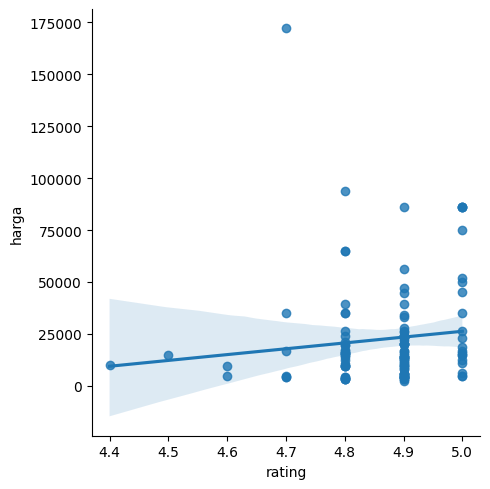

In [8]:
sns.lmplot(data = data_multipage_no_ads ,x='rating', y='harga');

In [9]:
corr_rho, pval_s = stats.spearmanr(data_multipage_no_ads['rating'], data_multipage_no_ads['harga'])
print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")

rho-correlation: 0.20, p-value: 0.028887867955329806


Menurut perhitungan nilai p-value yang diperoleh < 0.05, yakni sebesar 0.0288, maka korelasi antara rating dengan harga seblak adalah kebetulan.

# CONCLUSION

Hasil analisis data seblak dari platform Tokopedia, yang mencakup 124 data merk seblak, harga, jumlah produk terjual, kota penjual, dan rating seblak, menunjukkan bahwa mengembangkan skema bisnis dropship mungkin masih sulit untuk dilakukan. Ini disebabkan oleh beberapa faktor yang signifikan.

Pertama, terdapat kecenderungan adanya outlier dalam data harga, jumlah penjualan, dan rating seblak. Outlier ini dapat mengganggu analisis keuntungan dan strategi penjualan karena mempengaruhi variasi data.

Faktor kedua adalah pendapatan rata-rata bulanan untuk penjual seblak, yang berkisar antara Rp.1.689.728 hingga Rp.4.572.771. Selain itu, perbedaan harga jual seblak antara wilayah Jabodetabek dan di luar Jabodetabek juga signifikan, dengan harga di Jabodetabek sekitar Rp18.734,07 dan di luar Jabodetabek sekitar Rp27.602.

Terakhir, terdapat keraguan terhadap kecenderungan pelanggan yang menyukai produk murah. Meskipun produk dengan harga rendah terlihat memiliki rating yang tinggi, hal ini mungkin disebabkan oleh faktor lain seperti kualitas produk, kondisi kota, atau minat konsumen, dan bukan hanya karena harga rendah itu sendiri.

Karena faktor-faktor ini, saya sebagai calon pebisnis seblak skema dropship mungkin akan mengalami kesulitan dalam mencapai tujuan meningkatkan pendapatan selama sebulan.  Tetapi masih memungkinkan jika saya melakukan beberapa alternatif lain, seperti memperbaiki kualitas produk, menyesuaikan strategi harga, atau mengeksplorasi peluang bisnis yang berbeda sepenuhnya. 